# Information

## **Students Information:**


1. Student 1
  * Name = Peyman 
  * Last Name = Naseri
  * Student ID = 96100522
2. Student 2
  * Name = Reza 
  * Last Name = Bagheri
  * Student ID = 96100352




## **Project Information:**
* Course: Deep Learning
* Project Definition: [link](https://mlclass.ir/homework/project.pdf)
* colab: [link](https://colab.research.google.com/drive/1aB-dUUkX5fZBmF8F9gsTJ-p80hDgiHBe#scrollTo=jb-jj78BsGRp) 
* github:

# Setup

## GPU Setup


for use local gpu run this comand in anaconda prompet:
 
      1) pip install jupyter_http_over_ws
      2) jupyter serverextension enable --py jupyter_http_over_ws
      3) jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0
      
copy url and paste on colab

In [ ]:
import torch
#Check GPU
# torch.cuda.get_device_name(0)

## Change `cuda` Version for installing `mxnet` and `datawig`

In [ ]:
#Uninstall the current CUDA version

# !apt-get --purge remove cuda nvidia* libnvidia-*
# !dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
# !apt-get remove cuda-*
# !apt autoremove
# !apt-get update

In [ ]:
# !wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
# !dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
# !apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
# !apt-get update
# !apt-get install cuda=9.0.176-1

In [ ]:
# !nvcc --version

In [ ]:
# !pip install spacy==2.0.18 folium==0.2.1 imgaug==0.2.7
# !pip install numpy

# #Lets install all the package needed
# !pip install mxnet-cu90
# !pip install gluoncv
# !pip install d2l

# #datawig
# !wget https://raw.githubusercontent.com/awslabs/datawig/master/requirements/requirements.gpu-cu90.txt
# !pip install datawig --no-deps -r requirements.gpu-cu90.txt
# !rm requirements.gpu-cu90.txt

In [ ]:
# # check gpu
# from mxnet import nd, gpu, gluon, autograd
# from mxnet.gluon import nn
# from mxnet.gluon.data.vision import datasets, transforms
# import time
# y = nd.random.uniform(shape=(3,4), ctx=gpu(0))
# print(y)

## Install required package

In [ ]:
# ! pip install --upgrade category_encoders
# ! pip install catboost
! pip install xgboost
! pip install lightgbm
# ! pip install pandas-profiling==3.1.  0   # generates comprehensive reports automatically
# ! pip install -U deepctr-torch
# ! pip install pytorch-widedeep

# ! pip install datawig

# ! gdown https://raw.githubusercontent.com/awslabs/datawig/master/requirements/requirements.gpu-cu90.txt
# ! pip install datawig --no-deps -r requirements.gpu-cu90.txt
# ! rm requirements.gpu-cu90.txt



## Download Data
This line will download the csv file from provided [public link](https://drive.google.com/file/d/1HBH9S64qfm_e2BNuCVDh_ipVaRmdufo7/view) in google drive

In [ ]:
! gdown --id 1HBH9S64qfm_e2BNuCVDh_ipVaRmdufo7  

Downloading...
From: https://drive.google.com/uc?id=1HBH9S64qfm_e2BNuCVDh_ipVaRmdufo7
To: /content/train_dataset.csv
100% 39.1M/39.1M [00:00<00:00, 151MB/s]


## Import & Config Packages

In [ ]:
from google.colab import files
import os
import numpy as np
import pandas as pd 
# from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns               
%matplotlib inline
sns.set()
plt.style.use("ggplot")

import warnings                                            
warnings.filterwarnings('ignore')

## Read and Split Data

In [ ]:
from typing import Generator
raw_df = pd.read_csv('train_dataset.csv', parse_dates=['click_timestamp'])

train_size = 0.7
validation_size = 0.2
test_size = 0.1

# train dataset
df= raw_df.sample(frac=train_size,random_state=200) #random state is a seed value

temp= raw_df.drop(df.index)

# validation dataset
val_df = temp.sample(frac=validation_size/(1-train_size),random_state=201)

# test dataset
test_df = temp.drop(val_df.index)

print("train size: ", len(df))
print("valid size: ", len(val_df))
print("test size : ", len(test_df))


train size:  70000
valid size:  20000
test size :  10000


# Data Cleaning and Analysis

---






```
# This is formatted as code
```

## Confronting Data
First let's take a good first look at the data...

In [ ]:
# A glimpse of the data...
df

,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,partner_id,user_id
71488,0,-1.0000,-1,2020-08-04 18:47:01,-1,0.00,-1,FF2C446555E3822B0E0FC3406116E86D,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,FC0822AC6C181676D9FB22D06747C4EB,3E0598621D24271F91E7853AD7DED4BE
18462,0,-1.0000,-1,2020-08-04 09:54:08,-1,0.00,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3B4AAA4CE81BF8DE122915672418824D,432231848659476A3528EFEAC8B35B7E
5190,0,-1.0000,-1,2020-08-04 07:25:54,326,0.00,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,41417B1A2B2BCD8B234EC61B886FADCF,635623BABBB7DA2E072D8C339F606E15,80DF9DD23FCDB4F869BD699276D0A677,E4E565E79CE9F35744B7C43DDFB8B07C,064556360E05D2015C183D7D9F808884,220747D7CBBCDDB0A25FEA3F5C1FE25F,-1,-1,57A1D462A03BD076E029CF9310C11FC5,A51EB5C7DE0D3518D31D6ABA910FFD83,41417B1A2B2BCD8B234EC61B886FADCF 68291C52DA667...,A9D8254930B7A1D7265C595AE6120C90,117AC647F9AD7BB3E0F7ED0BA947F528
49745,0,-1.0000,-1,2020-08-04 10:05:26,35,0.00,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,-1,A5D15FC386510762EC0DDFF54ABE6F94,8D4EE2AF8207DD97BE20AD96F014AD95,033E492229C2222EFAA16EE8A6462D8B,D28A87BAAF0922BEB3E8099E6E262237,AA4B14C4176A235370FAF604A5FEA467,-1,-1,-1,-1,2AC62132FBCFA093B9426894A4BC6278,48246AF5280D2B2BD91718A6796140C1,4F1F93F65CDC91886883DBB25E60563E 2FC81788CFD2B...,9D8E4D89210B822B2060852D2DD143FE,D80BA17E82A24C570EE33F9983D30D33
51643,1,49.5600,111552,2020-08-03 18:04:01,0,49.56,-1,7E56C27BFF0305E788DA55A029EC4988,753CF7753EC7A396179ED3594653CC13,-1,-1,B4B45C6CE5FC4DE45AB02974D8849DBD,A78952B21B4165ADA2189AE66887E2F1,30131E72F860C21850E0F2BB16B862DF,C9AD8B2AEB38F319F959CBAC5B8B5DCB,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,5C70BCFD2C4D7FE89950A50471ED454C,D9D8B26F34985A255BF8E50049004D19 C7F1AB27EE3B4...,E3DDEB04F8AFF944B11943BB57D2F620,27B67F58E056750BF16600D06BEFB857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94678,0,-1.0000,-1,2020-08-03 23:55:51,1268,0.00,88460293E9517D21E39AA889BD5AADC8,D7D1FB49049702BF6338894757E0D959,463F6EDA5C02EC7BE312CE59602612F8,1B491180398E2F0390E6A588B3BCE291,-1,7532B3FBAFEC164460C4ED6FEB0C022C,FE4A86571601A1EF619CDB48BCD7F9A3,58D6D0E7760308F75E5FA67E03740C1E,-1,-1,-1,-1,989EEF92F2A525DD896557425EA7C4C7,F66EF12D6924259F8DE29ADC2C9A0107,E309B693F6377296BC57BF52F7632DBC 250C519EEAA46...,51EBAAC05E372CBCDF0F207517A225AB,F471D8E8421B208D59F8BD857A88C5B2
43875,1,128.2100,178559,2020-08-04 01:36:08,13,24.14,-1,D7D1FB49049702BF6338894757E0D959,1D0E30BAA4D8F6E1CB9412930BE16B51,-1,-1,6A21F69EBA80612A04B0F6BAC857AAF2,44DAF5366826FACDB000FE81397B1A7F,C4ADC9448F19FF48C1AEBF2B3DF1638F,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,1C6F8A4799C8CFADA905EDD3A645D4F6,E7964ADC0C2CC859521CEED95AB6EA8D,E3DDEB04F8AFF944B11943BB57D2F620,AF52E06899774E8B356032D3C34FD2A9
26310,1,110.8553,2463,2020-08-04 04:47:15,53,130.00,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,43BD587BC168946821477AFB53C8D98D,C45A9AC6D102ACAEEDF0D6F78636D84A,6A1F1F344D0A4A99940699B11365E7E8,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,-1,-1,-1,-1,-1,2AC62132FBCFA093B9426894A4BC6278,8B10CE51736E2296A3373C4F691787C3,6A1F1F344D0A4A99940699B11365E7E8 B52BBC01641E6...,221D098F6804779950D24B861E31EF0E,AA686828E87DB5BD9D559A4EAC3F2E62
77389,0,-1.0000,-1,2020-08-03 14:54:50,-1,0.00,-1,D7D1FB49049702BF6338894757E0D959,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,8B573DDAF7E0C5B6BE6195E737251064,7EA98208FF85FA5CF0A1022C5AB1647A


In [ ]:
df.dtypes

Sale                                  int64
SalesAmountInEuro                   float64
time_delay_for_conversion             int64
click_timestamp              datetime64[ns]
nb_clicks_1week                       int64
product_price                       float64
product_age_group                    object
device_type                          object
audience_id                          object
product_gender                       object
product_brand                        object
product_category(1)                  object
product_category(2)                  object
product_category(3)                  object
product_category(4)                  object
product_category(5)                  object
product_category(6)                  object
product_category(7)                   int64
product_country                      object
product_id                           object
product_title                        object
partner_id                           object
user_id                         

In [ ]:
df.describe()

,Sale,SalesAmountInEuro,time_delay_for_conversion,nb_clicks_1week,product_price,product_category(7)
count,70000.000000,70000.000000,7.000000e+04,70000.000000,70000.000000,70000.0
mean,0.137914,14.975120,4.373786e+04,231.237614,11.008593,-1.0
std,0.344812,125.753676,2.438252e+05,1111.406110,66.146894,0.0
min,0.000000,-1.000000,-1.000000e+00,-1.000000,0.000000,-1.0
25%,0.000000,-1.000000,-1.000000e+00,-1.000000,0.000000,-1.0
50%,0.000000,-1.000000,-1.000000e+00,0.000000,0.000000,-1.0
75%,0.000000,-1.000000,-1.000000e+00,49.000000,0.000000,-1.0
max,1.000000,23691.224980,2.554631e+06,25390.000000,3928.000000,-1.0


It seems that out of all 23 columns, the first one aka `sale` is the lable and 17 columns are categorical features. The column `product_category(7)` seems to be all -1, hence missing; so it can safely be removed.



In [ ]:
df = df.drop(['product_category(7)'] , axis=1)

As we have been told, all values of `-1` are considered missing. In the case of `product_price` and `click_timestamp` missing values are replaced by `0`. We shall replace all missing values by NaN.

In [ ]:
df.replace(to_replace=["-1", -1], value=np.nan, inplace=True)
df['product_price'].replace(to_replace=['0',0], value=np.nan, inplace=True)
df['click_timestamp'].replace(to_replace=['0',0], value=np.nan, inplace=True)

We can also change `click_timestamp` to numeric format for better usablity.


In [ ]:
df

,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_country,product_id,product_title,partner_id,user_id
71488,0.0,NaN,NaN,2020-08-04 18:47:01,NaN,NaN,NaN,FF2C446555E3822B0E0FC3406116E86D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FC0822AC6C181676D9FB22D06747C4EB,3E0598621D24271F91E7853AD7DED4BE
18462,0.0,NaN,NaN,2020-08-04 09:54:08,NaN,NaN,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3B4AAA4CE81BF8DE122915672418824D,432231848659476A3528EFEAC8B35B7E
5190,0.0,NaN,NaN,2020-08-04 07:25:54,326.0,NaN,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,41417B1A2B2BCD8B234EC61B886FADCF,635623BABBB7DA2E072D8C339F606E15,80DF9DD23FCDB4F869BD699276D0A677,E4E565E79CE9F35744B7C43DDFB8B07C,064556360E05D2015C183D7D9F808884,220747D7CBBCDDB0A25FEA3F5C1FE25F,NaN,57A1D462A03BD076E029CF9310C11FC5,A51EB5C7DE0D3518D31D6ABA910FFD83,41417B1A2B2BCD8B234EC61B886FADCF 68291C52DA667...,A9D8254930B7A1D7265C595AE6120C90,117AC647F9AD7BB3E0F7ED0BA947F528
49745,0.0,NaN,NaN,2020-08-04 10:05:26,35.0,NaN,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,NaN,A5D15FC386510762EC0DDFF54ABE6F94,8D4EE2AF8207DD97BE20AD96F014AD95,033E492229C2222EFAA16EE8A6462D8B,D28A87BAAF0922BEB3E8099E6E262237,AA4B14C4176A235370FAF604A5FEA467,NaN,NaN,NaN,2AC62132FBCFA093B9426894A4BC6278,48246AF5280D2B2BD91718A6796140C1,4F1F93F65CDC91886883DBB25E60563E 2FC81788CFD2B...,9D8E4D89210B822B2060852D2DD143FE,D80BA17E82A24C570EE33F9983D30D33
51643,1.0,49.5600,111552.0,2020-08-03 18:04:01,0.0,49.56,NaN,7E56C27BFF0305E788DA55A029EC4988,753CF7753EC7A396179ED3594653CC13,NaN,NaN,B4B45C6CE5FC4DE45AB02974D8849DBD,A78952B21B4165ADA2189AE66887E2F1,30131E72F860C21850E0F2BB16B862DF,C9AD8B2AEB38F319F959CBAC5B8B5DCB,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,5C70BCFD2C4D7FE89950A50471ED454C,D9D8B26F34985A255BF8E50049004D19 C7F1AB27EE3B4...,E3DDEB04F8AFF944B11943BB57D2F620,27B67F58E056750BF16600D06BEFB857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94678,0.0,NaN,NaN,2020-08-03 23:55:51,1268.0,NaN,88460293E9517D21E39AA889BD5AADC8,D7D1FB49049702BF6338894757E0D959,463F6EDA5C02EC7BE312CE59602612F8,1B491180398E2F0390E6A588B3BCE291,NaN,7532B3FBAFEC164460C4ED6FEB0C022C,FE4A86571601A1EF619CDB48BCD7F9A3,58D6D0E7760308F75E5FA67E03740C1E,NaN,NaN,NaN,989EEF92F2A525DD896557425EA7C4C7,F66EF12D6924259F8DE29ADC2C9A0107,E309B693F6377296BC57BF52F7632DBC 250C519EEAA46...,51EBAAC05E372CBCDF0F207517A225AB,F471D8E8421B208D59F8BD857A88C5B2
43875,1.0,128.2100,178559.0,2020-08-04 01:36:08,13.0,24.14,NaN,D7D1FB49049702BF6338894757E0D959,1D0E30BAA4D8F6E1CB9412930BE16B51,NaN,NaN,6A21F69EBA80612A04B0F6BAC857AAF2,44DAF5366826FACDB000FE81397B1A7F,C4ADC9448F19FF48C1AEBF2B3DF1638F,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,1C6F8A4799C8CFADA905EDD3A645D4F6,E7964ADC0C2CC859521CEED95AB6EA8D,E3DDEB04F8AFF944B11943BB57D2F620,AF52E06899774E8B356032D3C34FD2A9
26310,1.0,110.8553,2463.0,2020-08-04 04:47:15,53.0,130.00,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,43BD587BC168946821477AFB53C8D98D,C45A9AC6D102ACAEEDF0D6F78636D84A,6A1F1F344D0A4A99940699B11365E7E8,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,NaN,NaN,NaN,NaN,2AC62132FBCFA093B9426894A4BC6278,8B10CE51736E2296A3373C4F691787C3,6A1F1F344D0A4A99940699B11365E7E8 B52BBC01641E6...,221D098F6804779950D24B861E31EF0E,AA686828E87DB5BD9D559A4EAC3F2E62
77389,0.0,NaN,NaN,2020-08-03 14:54:50,NaN,NaN,NaN,D7D1FB49049702BF6338894757E0D959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8B573DDAF7E0C5B6BE6195E737251064,7EA98208FF85FA5CF0A1022C5AB1647A


In [ ]:
df['click_timestamp_secs'] = pd.to_datetime(df['click_timestamp']).astype(int)/10**9
df.drop(['click_timestamp'], axis=1, inplace=True)

In [ ]:
df

,Sale,SalesAmountInEuro,time_delay_for_conversion,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_country,product_id,product_title,partner_id,user_id,click_timestamp_secs
71488,0.0,NaN,NaN,NaN,NaN,NaN,FF2C446555E3822B0E0FC3406116E86D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FC0822AC6C181676D9FB22D06747C4EB,3E0598621D24271F91E7853AD7DED4BE,1.596567e+09
18462,0.0,NaN,NaN,NaN,NaN,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3B4AAA4CE81BF8DE122915672418824D,432231848659476A3528EFEAC8B35B7E,1.596535e+09
5190,0.0,NaN,NaN,326.0,NaN,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,41417B1A2B2BCD8B234EC61B886FADCF,635623BABBB7DA2E072D8C339F606E15,80DF9DD23FCDB4F869BD699276D0A677,E4E565E79CE9F35744B7C43DDFB8B07C,064556360E05D2015C183D7D9F808884,220747D7CBBCDDB0A25FEA3F5C1FE25F,NaN,57A1D462A03BD076E029CF9310C11FC5,A51EB5C7DE0D3518D31D6ABA910FFD83,41417B1A2B2BCD8B234EC61B886FADCF 68291C52DA667...,A9D8254930B7A1D7265C595AE6120C90,117AC647F9AD7BB3E0F7ED0BA947F528,1.596526e+09
49745,0.0,NaN,NaN,35.0,NaN,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,NaN,A5D15FC386510762EC0DDFF54ABE6F94,8D4EE2AF8207DD97BE20AD96F014AD95,033E492229C2222EFAA16EE8A6462D8B,D28A87BAAF0922BEB3E8099E6E262237,AA4B14C4176A235370FAF604A5FEA467,NaN,NaN,NaN,2AC62132FBCFA093B9426894A4BC6278,48246AF5280D2B2BD91718A6796140C1,4F1F93F65CDC91886883DBB25E60563E 2FC81788CFD2B...,9D8E4D89210B822B2060852D2DD143FE,D80BA17E82A24C570EE33F9983D30D33,1.596536e+09
51643,1.0,49.5600,111552.0,0.0,49.56,NaN,7E56C27BFF0305E788DA55A029EC4988,753CF7753EC7A396179ED3594653CC13,NaN,NaN,B4B45C6CE5FC4DE45AB02974D8849DBD,A78952B21B4165ADA2189AE66887E2F1,30131E72F860C21850E0F2BB16B862DF,C9AD8B2AEB38F319F959CBAC5B8B5DCB,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,5C70BCFD2C4D7FE89950A50471ED454C,D9D8B26F34985A255BF8E50049004D19 C7F1AB27EE3B4...,E3DDEB04F8AFF944B11943BB57D2F620,27B67F58E056750BF16600D06BEFB857,1.596478e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94678,0.0,NaN,NaN,1268.0,NaN,88460293E9517D21E39AA889BD5AADC8,D7D1FB49049702BF6338894757E0D959,463F6EDA5C02EC7BE312CE59602612F8,1B491180398E2F0390E6A588B3BCE291,NaN,7532B3FBAFEC164460C4ED6FEB0C022C,FE4A86571601A1EF619CDB48BCD7F9A3,58D6D0E7760308F75E5FA67E03740C1E,NaN,NaN,NaN,989EEF92F2A525DD896557425EA7C4C7,F66EF12D6924259F8DE29ADC2C9A0107,E309B693F6377296BC57BF52F7632DBC 250C519EEAA46...,51EBAAC05E372CBCDF0F207517A225AB,F471D8E8421B208D59F8BD857A88C5B2,1.596499e+09
43875,1.0,128.2100,178559.0,13.0,24.14,NaN,D7D1FB49049702BF6338894757E0D959,1D0E30BAA4D8F6E1CB9412930BE16B51,NaN,NaN,6A21F69EBA80612A04B0F6BAC857AAF2,44DAF5366826FACDB000FE81397B1A7F,C4ADC9448F19FF48C1AEBF2B3DF1638F,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,1C6F8A4799C8CFADA905EDD3A645D4F6,E7964ADC0C2CC859521CEED95AB6EA8D,E3DDEB04F8AFF944B11943BB57D2F620,AF52E06899774E8B356032D3C34FD2A9,1.596505e+09
26310,1.0,110.8553,2463.0,53.0,130.00,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,43BD587BC168946821477AFB53C8D98D,C45A9AC6D102ACAEEDF0D6F78636D84A,6A1F1F344D0A4A99940699B11365E7E8,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,NaN,NaN,NaN,NaN,2AC62132FBCFA093B9426894A4BC6278,8B10CE51736E2296A3373C4F691787C3,6A1F1F344D0A4A99940699B11365E7E8 B52BBC01641E6...,221D098F6804779950D24B861E31EF0E,AA686828E87DB5BD9D559A4EAC3F2E62,1.596516e+09
77389,0.0,NaN,NaN,NaN,NaN,NaN,D7D1FB49049702BF6338894757E0D959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8B573DDAF7E0C5B6BE6195E737251064,7EA98208FF85FA5CF0A1022C5AB1647A,1.596466e+09


Now it's time to generete a preliminary report of the data.

In [ ]:
# profile = ProfileReport(df, title="Preliminary Report",
#                         categorical_maximum_correlation_distinct= 10000,
#                         explorative=True)
# profile.to_notebook_iframe()
# profile.to_file("preliminary_report.html")

We will use this report thouroughly in the upcoming sections. Here, let's take a copy of the train data before dropping more columns and filling missed values to use in the XGBoost model later on, that is because XGBoost is not sensitive to missing values.

In [ ]:
gf = df.copy()

## Basic Trimming

First note that almost half the cells are missing. We can't fill them all so we have to remove a seroius number of cells.
We have been told that `SalesAmountInEuro` is missing for clicks not resulting in a [conversion](https://en.wikipedia.org/wiki/Conversion_marketing#:~:text=conversions%E2%80%94that%20is%2C%20site%20visitors%20who%20are%20paying%20customers.), which essentially means there is no way we could find out any info on the distibution of `SalesAmountInEuro` where `Sale` equals to `0`; so we have to drop the column. Furthermore, a look at the nullity heatmap of the report suggest that `time_delay_for_conversion` and `product_price` suffer from the same phenamenon. We can examine this result up close:

In [ ]:
all_null = df.isnull().sum()*100/len(df)
null_df= pd.DataFrame(all_null, columns=['total'])
null_df['Sale=0'] = df[df['Sale']==0].isnull().sum()*100/len(df[df['Sale']==0])
null_df['Sale=1'] = df[df['Sale']==1].isnull().sum()*100/len(df[df['Sale']==1])
null_df

,total,Sale=0,Sale=1
Sale,0.000000,0.000000,0.000000
SalesAmountInEuro,86.208571,100.000000,0.000000
time_delay_for_conversion,86.267143,100.000000,0.424694
nb_clicks_1week,46.100000,46.122361,45.960224
product_price,87.134286,100.000000,6.712244
product_age_group,75.737143,74.954429,80.629791
device_type,0.042857,0.048056,0.010358
audience_id,71.674286,73.917078,57.654858
product_gender,75.682857,74.952772,80.246530
product_brand,65.881429,64.728400,73.088875


The table above shows the number of missing values in total, where `Sale` equals `0` and where equals `1`. Now it can safely be said that the discussed columns should be dropped. It shoud be noted that there are no other signs of such nullity imbalance between the two groups which is a good thing.

Also notice the high rate of missing value in `product_category(6)`. This columns is highly correlated with `product_category(1)`, so whatever info the former is going to provide us, it can probably be inferred from the latter. Thus, we may drop also `product_category(6)`.



In [ ]:
df.drop(['SalesAmountInEuro', 'product_price', 'time_delay_for_conversion', 'product_category(6)'], axis=1, inplace=True)

Now let's drop rows having more than 60 percent of their values missing.


In [ ]:
threshold = 1 - 0.6
# Keep only the rows with at least 40 percent non-NA values.
df.dropna(thresh=threshold*len(df.columns), inplace=True)


Let's generate another report to see how changes made effect.


In [ ]:
# profile = ProfileReport(df, title="Basic trimming Report",
#                         categorical_maximum_correlation_distinct= 10000,
#                         explorative=True)
# profile.to_notebook_iframe()
# profile.to_file("basic_trimming.html")

## Filling Missing Cells

**Warning**: *This implementation using `mxnet` is quite problematic if right dependencies are not configured. You can run the possibly commented out code in [this section](#scrollTo=Setup) to downgrade `coda` and train using gpu.*

We had a look at [this](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e) article and we chose to use `datawig` for the sake of sophostication! `datawig`, even though computationaly expensive, seems the most reasonable choice: it aims to compute the most likely value based on the knowledge from other columns.

Let's again take a look at columns nullity rate:


In [ ]:
all_null = df.isnull().sum()*100/len(df)
null_df= pd.DataFrame(all_null, columns=['total'])
null_df['Sale=0'] = df[df['Sale']==0].isnull().sum()*100/len(df[df['Sale']==0])
null_df['Sale=1'] = df[df['Sale']==1].isnull().sum()*100/len(df[df['Sale']==1])
null_df.sort_values(by=['total'], ascending=False)


,total,Sale=0,Sale=1
product_category(5),85.841186,86.114352,84.155125
audience_id,62.008857,65.445950,40.794090
product_age_group,56.269633,54.779643,65.466297
product_gender,56.171791,54.776651,64.783010
product_category(4),48.498893,48.619214,47.756233
product_brand,38.506102,36.316309,52.022161
product_category(3),14.143365,14.053197,14.699908
nb_clicks_1week,2.852876,2.722676,3.656510
product_title,2.304444,2.121294,3.434903
product_category(2),1.869303,1.714388,2.825485


6 columns have more than 15% missing values. 14% of `product_category(3)` values are missing and 5 columns have less than 3% total missing values. Other columns have no null value. 

We are going to use [`datawig`](httpshttps://datawig.readthedocs.io/en/latest/source/intro.html) to impute missing values. `datawig` imputes missing values in columns based on some *input columns* that have no values missing. Luckily there are some strong correlations between categorial columns that means given the right model a fair prediction can be made of missing values.

We impute missing values in three steps. First, we impute values for columns with less than 3% nullity, namely `product_category(1)`, `product_category(2)`, `product_title` and `nb_clicks_1week`. Secondly we impute values for `product_category(3)` and lastly, come columns with more than 15% nullity rate: `product_category(5)` `audience_id`, `product_age_group`, `product_gender`, `product_category(4)` and `product_brand`


In [ ]:
filled_df = df.copy()

In [ ]:
# from mxnet import gpu
# import datawig as dw

# def fill_null(dataframe, model_number, output):
#     imputer = dw.SimpleImputer.load('imputer_model/imputer_model_'+model_number)
#     imputer.predict(dataframe, inplace=True)
#     dataframe[output].fillna(dataframe[output+'_imputed'], inplace=True)
#     dataframe.drop([output+'_imputed'], axis=1, inplace=True)
#     if output+'_imputed_proba' in dataframe.columns:
#       dataframe.drop([output+'_imputed_proba'], axis=1, inplace=True)

# def impute(dataframe, new_input_cols, output_col, model_number):
#     #Initialize a SimpleImputer model
#     imputer = dw.SimpleImputer(
#         input_columns=['user_id',
#                       'device_type',
#                       'click_timestamp_secs',
#                       'product_country',
#                       'Sale',
#                       'partner_id',
#                       'product_id'] + new_input_cols,
#         output_column=output_col,
#         output_path = 'imputer_model/imputer_model_' + model_number
#     )
#     #Fit an imputer model on the train data
#     imputer.fit(train_df=dataframe, ctx=gpu(0))#, batch_size=8192, learning_rate=0.04)
#     #Predict missing values and fill them
#     fill_null(dataframe, model_number, output_col)
#     filled_df.to_csv('imputer_model/imputer_model_' 
#                      + model_number 
#                      + '/filled_df_'
#                      + model_number
#                      + '.csv')

### Download cleaned data if existing

In [ ]:
! gdown --id 1UZD4m0fDj9LAgAPX6mrN4fYonAkUYdq1

Downloading...
From: https://drive.google.com/uc?id=1UZD4m0fDj9LAgAPX6mrN4fYonAkUYdq1
To: /content/filled_dataset.csv
100% 24.7M/24.7M [00:00<00:00, 145MB/s] 


### Train `datawig` and impute values
**Warning**: *This section takes some time. If you want to access the trained models, just contact us.*

Default bath size was 16. Since the training was taking too much time, we increased both the batch size and learning rate (default 0.004) but time cost was not much difference and convergence rate much lower. Finally we managed to run it on GPU (see Section [GPU Setup](#scrollTo=GPU_Setup) with default parameters and the timing was fair then.

In [ ]:
# check if cleaned data exists:

if not os.path.isfile('filled_dataset.csv'):
  # First & Second group of columns
  impute(filled_df,
       [],
       'product_category(1)',
       '1')
  ! zip -r /content/imputer_model/imputer_model_1.zip /content/imputer_model/imputer_model_1
  files.download('/content/imputer_model/imputer_model_1.zip')

  impute(filled_df,
       ['product_category(1)'],
       'product_category(2)',
       '2')
  ! zip -r /content/imputer_model/imputer_model_2.zip /content/imputer_model/imputer_model_2
  files.download('/content/imputer_model/imputer_model_2.zip')

  impute(filled_df,
       ['product_category(1)',
        'product_category(2)'],
       'product_title',
       '3')
  ! zip -r /content/imputer_model/imputer_model_3.zip /content/imputer_model/imputer_model_3
  files.download('/content/imputer_model/imputer_model_3.zip')

  impute(filled_df,
       ['product_category(1)',
        'product_category(2)',
        'product_title'],
       'nb_clicks_1week',
       '4')
  ! zip -r /content/imputer_model/imputer_model_4.zip /content/imputer_model/imputer_model_4
  files.download('/content/imputer_model/imputer_model_4.zip')

  impute(filled_df,
        ['product_category(1)',
          'product_category(2)',
          'product_title',
          'nb_clicks_1week'],
        'product_category(3)',
        '5')
  ! zip -r /content/imputer_model/imputer_model_5.zip /content/imputer_model/imputer_model_5
  files.download('/content/imputer_model/imputer_model_5.zip')

  
  # Third group of columns Now let's turn to the third group.

  impute(filled_df,
        ['product_category(1)',
          'product_category(2)',
          'product_title',
          'nb_clicks_1week',
          'product_category(3)'],
        'product_category(5)',
        '6')
  ! zip -r /content/imputer_model/imputer_model_6.zip /content/imputer_model/imputer_model_6
  files.download('/content/imputer_model/imputer_model_6.zip')

  impute(filled_df,
        ['product_category(1)',
          'product_category(2)',
          'product_title',
          'nb_clicks_1week',
          'product_category(3)'],
        'audience_id',
        '7')
  ! zip -r /content/imputer_model/imputer_model_7.zip /content/imputer_model/imputer_model_7
  files.download('/content/imputer_model/imputer_model_7.zip')

  impute(filled_df,
        ['product_category(1)',
          'product_category(2)',
          'product_title',
          'nb_clicks_1week',
          'product_category(3)'],
        'product_age_group',
        '8')
  ! zip -r /content/imputer_model/imputer_model_8.zip /content/imputer_model/imputer_model_8
  files.download('/content/imputer_model/imputer_model_8.zip')

  impute(filled_df,
        ['product_category(1)',
          'product_category(2)',
          'product_title',
          'nb_clicks_1week',
          'product_category(3)'],
        'product_gender',
        '9')
  ! zip -r /content/imputer_model/imputer_model_9.zip /content/imputer_model/imputer_model_9
  files.download('/content/imputer_model/imputer_model_9.zip')

  impute(filled_df,
        ['product_category(1)',
          'product_category(2)',
          'product_title',
          'nb_clicks_1week',
          'product_category(3)'],
        'product_category(4)',
        '10')
  ! zip -r /content/imputer_model/imputer_model_10.zip /content/imputer_model/imputer_model_10
  files.download('/content/imputer_model/imputer_model_10.zip')

  impute(filled_df,
        ['product_category(1)',
          'product_category(2)',
          'product_title',
          'nb_clicks_1week',
          'product_category(3)'],
        'product_brand',
        '11')
  ! zip -r /content/imputer_model/imputer_model_11.zip /content/imputer_model/imputer_model_11
  files.download('/content/imputer_model/imputer_model_11.zip')

  filled_df.to_csv('filled_dataset.csv')
else:
  filled_df = pd.read_csv('filled_dataset.csv')
  

We can drop the unnamed index columns created in the process

In [ ]:
filled_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Sale', 'nb_clicks_1week',
       'product_age_group', 'device_type', 'audience_id', 'product_gender',
       'product_brand', 'product_category(1)', 'product_category(2)',
       'product_category(3)', 'product_category(4)', 'product_category(5)',
       'product_country', 'product_id', 'product_title', 'partner_id',
       'user_id', 'click_timestamp_secs'],
      dtype='object')

In [ ]:
filled_df.drop(filled_df.columns[0:2], axis=1,inplace=True)

Let's check whether all missing values are filled or not.

In [ ]:
all_null = filled_df.isnull().sum()
null_df= pd.DataFrame(all_null, columns=['total'])
null_df.sort_values(by=['total'], ascending=False)

,total
Sale,0
nb_clicks_1week,0
user_id,0
partner_id,0
product_title,0
product_id,0
product_country,0
product_category(5),0
product_category(4),0
product_category(3),0


# Models
Four models were used in total. Two tree models and two models using deep neural networks.

## Tree models
Why tree models? We wanted to see how do tree models compete with usually used deep models in this field. We used two models XGBoost and LightGBM.
These models uses *unfilled* train data, since they are not sensitive to missing values.

Both have shown great performance on validation and test data at first try without any need for tuning. We tried LightGBM after XGBoost because we had heard that it better supports categorical features.


### Data Preprocessing
In both of the models the data needs a bit of preprocessing and label encoding for categorical columns.
The difference is that `xgboost` requires data to be in `numpy` format and `lightgbm` requrires them to be `pandas.Dataframe`

The following function is used to preprocess test and validation data to be fed into the model

In [ ]:
def pre_proc_xgb(dataset):
  # trimming and cleaning
  dataset.drop(['product_category(7)'] , axis=1, inplace=True)
  dataset.replace(to_replace=["-1", -1], value=np.nan, inplace=True)
  dataset['product_price'].replace(to_replace=['0',0], value=np.nan, inplace=True)
  dataset['click_timestamp'].replace(to_replace=['0',0], value=np.nan, inplace=True)
  dataset['click_timestamp_secs'] = pd.to_datetime(dataset['click_timestamp']).astype(int)/10**9
  dataset.drop(['click_timestamp'], axis=1, inplace=True)
  # dataset[['SalesAmountInEuro', 'product_price', 'time_delay_for_conversion']] = np.nan


Now let's take a copy of the test and validation datasets to use exclusively in this model

In [ ]:
# test_gf = test_df.copy()
# val_gf = val_df.copy()
# pre_proc_xgb(test_gf)
# pre_proc_xgb(val_gf)

In [ ]:
gf = raw_df.copy()
pre_proc_xgb(gf)
gf

,Sale,SalesAmountInEuro,time_delay_for_conversion,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_country,product_id,product_title,partner_id,user_id,click_timestamp_secs
0,0.0,NaN,NaN,NaN,NaN,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,B69E439E41E0BEAD764ABF16D7FD96C9,NaN,E3DDEB04F8AFF944B11943BB57D2F620,5E2C678F6586B67F61A377E1534E01FC,1.596514e+09
1,0.0,NaN,NaN,NaN,NaN,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,404D3D9D03297504F3509032DCFA02F0,NaN,E3DDEB04F8AFF944B11943BB57D2F620,E8247702C0DD294E0AE6B5B5E2F9E810,1.596506e+09
2,0.0,NaN,NaN,NaN,NaN,4C90FD52FC53D2C1C205844CB69575AB,FF2C446555E3822B0E0FC3406116E86D,NaN,C45A9AC6D102ACAEEDF0D6F78636D84A,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,NaN,NaN,NaN,NaN,2AC62132FBCFA093B9426894A4BC6278,B09E51338E0EED59C5A859B13631C370,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...,12E43E51784BDE3CB9E0EF6310A7D5C5,9FD001258907F541D497040C64383696,1.596560e+09
3,0.0,NaN,NaN,NaN,NaN,NaN,D7D1FB49049702BF6338894757E0D959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,080614393A57816D7A655695E2DBE728,NaN,E3DDEB04F8AFF944B11943BB57D2F620,225741ACF2DBB2E5948268F5D5D352E6,1.596487e+09
4,0.0,NaN,NaN,1064.0,NaN,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,NaN,1B491180398E2F0390E6A588B3BCE291,9B57D98465FD7D5AF39448DC29E95DC8,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,NaN,NaN,989EEF92F2A525DD896557425EA7C4C7,350271BAFD7C7AAF6FB1424CF3DD4827,097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...,F0FD783189F55BAFC331AD347EAE6863,160A90377E54124D0BD31DB6735F0B33,1.596488e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,NaN,NaN,NaN,NaN,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9F30550A2589106D327B2F7C829CA250,648D3981019554765DDA9397BD7D03BC,1.596487e+09
99996,0.0,NaN,NaN,NaN,NaN,NaN,D7D1FB49049702BF6338894757E0D959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98594F28C91322F1DAF20DF86F3F6D8A,4EA2BA87F29B58C10C746F04B0447F4B,1.596477e+09
99997,1.0,10.15916,942.0,169.0,3.0,NaN,7E56C27BFF0305E788DA55A029EC4988,BDA8EE634540EAA46AF7C693C5C1A677,NaN,FB4BF9BACFF8DA0ACD2E596ABE1FCFB4,B4B45C6CE5FC4DE45AB02974D8849DBD,A78952B21B4165ADA2189AE66887E2F1,369B6439F3366A8FCF39ECB292FE5D5B,1DD0728F072BF6087158DA849B46E55C,NaN,NaN,2AC62132FBCFA093B9426894A4BC6278,6D156288298F6AD8D557F4AB5D5A0837,4F1F93F65CDC91886883DBB25E60563E 9124E8B6C156C...,9D8E4D89210B822B2060852D2DD143FE,B40B9949419CDDF3873026B17BFBDB20,1.596530e+09
99998,0.0,NaN,NaN,30.0,NaN,NaN,D7D1FB49049702BF6338894757E0D959,2F89384F5373F64EA809EEC44387F05E,NaN,NaN,62D6A49514020FA0B2E434DB0B506005,41DF6386116137A19E7DBC07CE44C95A,0C794498732FC4833A4B7F29F8F072E3,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,DCC8F601DF76439F1B1D68E51AA79475,E61B6A17E1ADD36CCE4B4B0232EC9895,E3DDEB04F8AFF944B11943BB57D2F620,5BD2C5F5F2396CDC662549BD604CCE29,1.596511e+09


In [ ]:
threshold = 1 - 0.8
# Keep only the rows with at least 40 percent non-NA values.
gf.dropna(thresh=threshold*len(gf.columns), inplace=True)

In [ ]:
deleted_columns =['SalesAmountInEuro','time_delay_for_conversion',
                  'click_timestamp_secs',
               'audience_id',
              'product_title','user_id',
              # 'product_brand',
              'product_id',
               ] 
gf = gf.drop(deleted_columns, axis=1)

In [ ]:
gf.dtypes

Sale                   float64
nb_clicks_1week        float64
product_price          float64
product_age_group       object
device_type             object
product_gender          object
product_brand           object
product_category(1)     object
product_category(2)     object
product_category(3)     object
product_category(4)     object
product_category(5)     object
product_category(6)     object
product_country         object
partner_id              object
dtype: object

In [ ]:
def encoding(gf):
  non_numeric_df = gf.select_dtypes(include=['object'])
  print(non_numeric_df.nunique())
  categorical_coulmns = list(non_numeric_df.columns)
  for col in categorical_coulmns :
    gf[col] = pd.factorize(gf[col])[0] + 1

In [ ]:
encoding(gf)

product_age_group         8
device_type               3
product_gender           10
product_brand          4769
product_category(1)      21
product_category(2)     144
product_category(3)     698
product_category(4)     909
product_category(5)     441
product_category(6)      88
product_country          16
partner_id              183
dtype: int64


In [ ]:
# encoded_data = pd.get_dummies(df)
# encoded_data.head()

Before running model training, is useful to see how features are correlated with decision feature, however, low correlation might not mean much because of the label encodings.

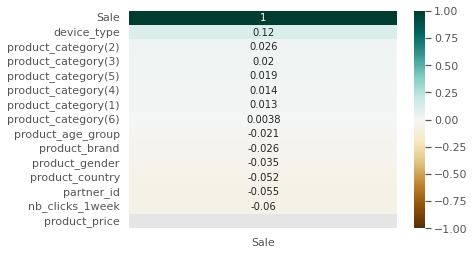

In [ ]:

sns.heatmap(gf.corr()[['Sale']].sort_values(by='Sale', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


In [ ]:
! pip install xgboost==1.5
! pip show xgboost

Name: xgboost
Version: 1.5.0
Summary: XGBoost Python Package
Home-page: https://github.com/dmlc/xgboost
Author: None
Author-email: None
License: Apache-2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, scipy
Required-by: 


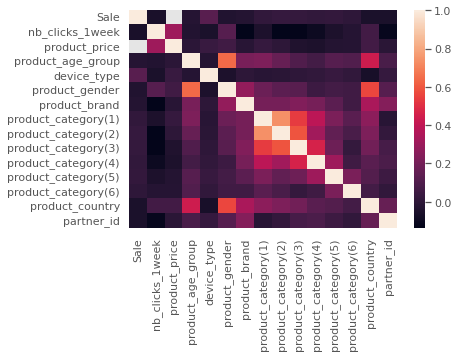

In [ ]:
sns.heatmap(gf.corr())

### XGBoost
You can read the documentation on how to use the package [here](https://xgboost.readthedocs.io/en/latest/index.html).

Datas for this model should be fed to it as `numpy` array:

In [ ]:
y = gf['Sale'].to_numpy()
X = gf.drop(columns=['Sale']).to_numpy()
from sklearn.model_selection import train_test_split 
x_train, x_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=43, shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=1/3, random_state=43, shuffle=True)

print('shape x_train:', x_train.shape)
print('shape x_val:', x_val.shape)
print('shape x_test:', x_test.shape)
print()
print('shape y_train:', y_train.shape)
print('shape y_val:', y_val.shape)
print('shape y_test:', y_test.shape)

shape x_train: (69973, 14)
shape x_val: (19992, 14)
shape x_test: (9997, 14)

shape y_train: (69973,)
shape y_val: (19992,)
shape y_test: (9997,)


In [ ]:
model = XGBClassifier(
    objective='binary:logistic',
    tree_method = 'gpu_hist',
    n_jobs=-1,
    n_estimators=1000,
    max_depth=16,
    colsample_bytree=0.8, 
    subsample=0.8, 
    learning_rate=0.2,
    min_child_weight=6,
)

model.fit(
    x_train, 
    y_train, 
    eval_metric=['logloss'], 
    eval_set=[(x_train, y_train), (x_val, y_val)], 
    verbose=True, 
    early_stopping_rounds = 20
)

plt.rcParams['figure.facecolor'] = 'white'
evals_result = model.evals_result()
# ax = plot_metric(evals_result, metric = 'logloss')
# plt.title('Xgboost Learning Curve')
# plt.show()


# fig,ax = plt.subplots(figsize=(7,10))
# xgb.plot_importance(model,
#                 ax=ax,
#                 height=0.5).set(xlabel='feature importance',
#                                          title='',
#                                          ylabel='feature')

y_test_pred = model.predict_proba(x_test)[:,1]
y_val_pred = model.predict_proba(x_val)[:,1]
y_val_class = np.where(y_val_pred > 0.5,1,0)
# print('Out of folds logloss is {:.4f}'.format(log_loss(y_val, y_val_pred)))



class_names = ['0','1']
# plot_confusion_matrix(confusion_matrix(y_val, y_val_class),
#                       classes=class_names, 
#                       normalize=True, 
#                       title='Normalized Confusion Matrix: Xgboost')
plt.show()

[0]	validation_0-logloss:0.51800	validation_1-logloss:0.51834
[1]	validation_0-logloss:0.40037	validation_1-logloss:0.40101
[2]	validation_0-logloss:0.31615	validation_1-logloss:0.31705
[3]	validation_0-logloss:0.25358	validation_1-logloss:0.25467
[4]	validation_0-logloss:0.22638	validation_1-logloss:0.22772
[5]	validation_0-logloss:0.18491	validation_1-logloss:0.18642
[6]	validation_0-logloss:0.16937	validation_1-logloss:0.17122
[7]	validation_0-logloss:0.15798	validation_1-logloss:0.16017
[8]	validation_0-logloss:0.13123	validation_1-logloss:0.13347
[9]	validation_0-logloss:0.11016	validation_1-logloss:0.11244
[10]	validation_0-logloss:0.09337	validation_1-logloss:0.09568
[11]	validation_0-logloss:0.08002	validation_1-logloss:0.08239
[12]	validation_0-logloss:0.07670	validation_1-logloss:0.07920
[13]	validation_0-logloss:0.06714	validation_1-logloss:0.06978
[14]	validation_0-logloss:0.05955	validation_1-logloss:0.06231
[15]	validation_0-logloss:0.05283	validation_1-logloss:0.05557
[1

Accuracy: 99.05%






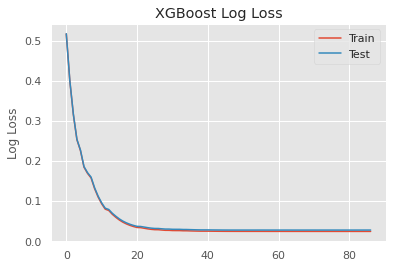

In [ ]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('\n\n\n')
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

In [ ]:
#report result precision, recall, f1-score on test data
from sklearn.metrics import classification_report
# y_pred = model.predict(X)
r = classification_report(y_test, predictions)
print(r)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      8630
         1.0       1.00      0.93      0.96      1367

    accuracy                           0.99      9997
   macro avg       0.99      0.97      0.98      9997
weighted avg       0.99      0.99      0.99      9997



### LightGBM
You can read the documentation on how to read the package [here](https://lightgbm.readthedocs.io/en/latest/).

In [ ]:
from typing import Generator
train_size = 0.7
validation_size = 0.2
test_size = 0.1

# train dataset
train_gf= gf.sample(frac=train_size,random_state=200) #random state is a seed value
temp= gf.drop(train_gf.index)
# validation dataset
val_gf = temp.sample(frac=validation_size/(1-train_size),random_state=201)
# test dataset
test_gf = temp.drop(val_gf.index)


print("train size: ", len(train_gf))
print("valid size: ", len(val_gf))
print("test size : ", len(test_gf))

target = 'Sale'
predictors = list(gf.columns)
predictors.remove('Sale')
categorical = list(gf.select_dtypes('object').columns)

train size:  69973
valid size:  19993
test size :  9996


In [ ]:
import pandas as pd
import time
import numpy as np
# from sklearn.cross_validation import train_test_split
import lightgbm as lgb

def lgb_modelfit_nocv(params, dtrain, dvalid, predictors, target='target', objective='binary', metrics='auc',
                 feval=None, early_stopping_rounds=20, num_boost_round=3000, verbose_eval=10, categorical_features=None):
    lgb_params = {
        'boosting_type': 'gbdt',
        'objective': objective,
        'metric':metrics,
        'learning_rate': 0.01,
        'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
        'max_depth': -1,  # -1 means no limit
        'min_child_samples': 20,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 255,  # Number of bucketed bin for feature values
        'subsample': 0.6,  # Subsample ratio of the training instance.
        'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.3,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'subsample_for_bin': 200000,  # Number of samples for constructing bin
        'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': 8,
        'verbose': 0,
        'metric':metrics
    }

    lgb_params.update(params)

    print("preparing validation datasets")

    xgtrain = lgb.Dataset(dtrain[predictors].values, label=dtrain[target].values,
                          feature_name=predictors,
                          categorical_feature=categorical_features
                          )
    xgvalid = lgb.Dataset(dvalid[predictors].values, label=dvalid[target].values,
                          feature_name=predictors,
                          categorical_feature=categorical_features
                          )
    
    evals_results = {}

    bst1 = lgb.train(lgb_params, 
                     xgtrain, 
                     valid_sets=[xgtrain, xgvalid], 
                     valid_names=['train','valid'], 
                     evals_result=evals_results, 
                     num_boost_round=num_boost_round,
                     early_stopping_rounds=early_stopping_rounds,
                     verbose_eval=10, 
                     feval=feval)

    n_estimators = bst1.best_iteration
    print("\nModel Report")
    print("n_estimators : ", n_estimators)
    print(metrics+":", evals_results['valid'][metrics][n_estimators-1])

    return bst1

In [ ]:
print("Training...")
params = {
    'learning_rate': 0.1,
    'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
    'max_depth': 3,  # -1 means no limit
    'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
    'max_bin': 100,  # Number of bucketed bin for feature values
    'subsample': 0.7,  # Subsample ratio of the training instance.
    'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
    'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
    'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
    'scale_pos_weight':99 # because training data is extremely unbalanced 
}
bst = lgb_modelfit_nocv(params, 
                        train_gf, 
                        val_gf, 
                        predictors, 
                        target, 
                        objective='binary', 
                        metrics='auc',
                        early_stopping_rounds=100, 
                        verbose_eval=True, 
                        num_boost_round=300, 
                        categorical_features=categorical)


Training...
preparing validation datasets
Training until validation scores don't improve for 100 rounds.
[10]	train's auc: 0.996815	valid's auc: 0.996408
[20]	train's auc: 0.99694	valid's auc: 0.996927
[30]	train's auc: 0.997	valid's auc: 0.996771
[40]	train's auc: 0.997784	valid's auc: 0.997142
[50]	train's auc: 0.998079	valid's auc: 0.997597
[60]	train's auc: 0.99818	valid's auc: 0.997585
[70]	train's auc: 0.998239	valid's auc: 0.997652
[80]	train's auc: 0.998286	valid's auc: 0.997623
[90]	train's auc: 0.998446	valid's auc: 0.997602
[100]	train's auc: 0.998475	valid's auc: 0.997563
[110]	train's auc: 0.998501	valid's auc: 0.997593
[120]	train's auc: 0.998534	valid's auc: 0.997557
[130]	train's auc: 0.998547	valid's auc: 0.99751
[140]	train's auc: 0.998561	valid's auc: 0.997503
[150]	train's auc: 0.998574	valid's auc: 0.997571
[160]	train's auc: 0.998589	valid's auc: 0.997501
Early stopping, best iteration is:
[69]	train's auc: 0.998243	valid's auc: 0.997662

Model Report
n_estimators

In [ ]:
# make predictions for test data
y_pred = bst.predict(test_gf[predictors])
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(test_gf['Sale'].values, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('\n\n\n')


Accuracy: 96.21%






In [ ]:
#report result precision, recall, f1-score on test data
from sklearn.metrics import classification_report
# y_pred = model.predict(X)
r = classification_report(test_gf['Sale'].values, predictions)
print(r)

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      8607
         1.0       0.79      1.00      0.88      1389

    accuracy                           0.96      9996
   macro avg       0.89      0.98      0.93      9996
weighted avg       0.97      0.96      0.96      9996



## Deep Models
We took suggestions on model choosing from the project documentation itself. With a bit further research it turned out that in datasets such as Criteo's which focus on click rates and marketing, deep models which integrate an ability of *memorization* perform better. Two of such models are **DeepFM** and **DeepWide** networks. Due to their architecture they can learn both complicated and straighforward features; thus, feature engineering is done automatically.

In both of the models different learning rates were tested to achieve best result.

### Data Preprocessing
Here is the function which can be used to prepare a test dataset for prediction. Missing values should be filled using the `datawig` model discussed earlier.

In [ ]:
def pre_proc_deep(dataset):
  # trimming and cleaning
  dataset = dataset.drop(['product_category(7)'] , axis=1)
  dataset.replace(to_replace=["-1", -1], value=np.nan, inplace=True)
  dataset['product_price'].replace(to_replace=['0',0], value=np.nan, inplace=True)
  dataset['click_timestamp'].replace(to_replace=['0',0], value=np.nan, inplace=True)
  dataset['click_timestamp_secs'] = pd.to_timedelta(df['click_timestamp']).dt.total_seconds().astype(int)
  dataset.drop(['click_timestamp'], axis=1, inplace=True)
  dataset.drop(['SalesAmountInEuro', 'product_price', 'time_delay_for_conversion', 'product_category(6)'], axis=1, inplace=True)

  # filling null values
  fill_null(dataset, '1', 'product_category(1)')
  fill_null(dataset, '2', 'product_category(2)')
  fill_null(dataset, '3', 'product_title')
  fill_null(dataset, '4', 'nb_clicks_1week')
  fill_null(dataset, '5', 'product_category(3)')
  fill_null(dataset, '6', 'audience_id')
  fill_null(dataset, '7', 'product_category(5)')
  fill_null(dataset, '8', 'product_age_group')
  fill_null(dataset, '9', 'product_gender')
  fill_null(dataset, '10', 'product_category(4)')
  fill_null(dataset, '11', 'product_brand')







### Deep Factorization Machine using `mxnet`
**Warning**: *This implementation using `mxnet` is quite problematic if right dependencies are not configured. You can run the possibly commented out code in [this section](#scrollTo=Setup) to downgrade `coda` and train using gpu.*

In [ ]:
# Download cleaned data
! gdown --id 1UZD4m0fDj9LAgAPX6mrN4fYonAkUYdq1
import pandas as  pd
data = pd.read_csv('filled_dataset.csv')
data = data.drop(data.columns[[0, 1]], axis=1)  # df.columns is zero-based pd.Index
data



Downloading...
From: https://drive.google.com/uc?id=1UZD4m0fDj9LAgAPX6mrN4fYonAkUYdq1
To: /content/filled_dataset.csv
100% 24.7M/24.7M [00:00<00:00, 152MB/s] 


,Sale,nb_clicks_1week,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_country,product_id,product_title,partner_id,user_id,click_timestamp_secs
0,0.0,326.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,B51388CE4A9AA3CFD86DEBBB434BAE11,A5D15FC386510762EC0DDFF54ABE6F94,41417B1A2B2BCD8B234EC61B886FADCF,635623BABBB7DA2E072D8C339F606E15,80DF9DD23FCDB4F869BD699276D0A677,E4E565E79CE9F35744B7C43DDFB8B07C,064556360E05D2015C183D7D9F808884,220747D7CBBCDDB0A25FEA3F5C1FE25F,57A1D462A03BD076E029CF9310C11FC5,A51EB5C7DE0D3518D31D6ABA910FFD83,41417B1A2B2BCD8B234EC61B886FADCF 68291C52DA667...,A9D8254930B7A1D7265C595AE6120C90,117AC647F9AD7BB3E0F7ED0BA947F528,1.596526e+09
1,0.0,35.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,54FA113F9CC4F3EE0F30C54EC968113F,A5D15FC386510762EC0DDFF54ABE6F94,8D4EE2AF8207DD97BE20AD96F014AD95,033E492229C2222EFAA16EE8A6462D8B,D28A87BAAF0922BEB3E8099E6E262237,AA4B14C4176A235370FAF604A5FEA467,067525A83E1875CB1828F4F9ADC752F6,DC3F316AA514CDA1C7E9F84552EFAC4F,2AC62132FBCFA093B9426894A4BC6278,48246AF5280D2B2BD91718A6796140C1,4F1F93F65CDC91886883DBB25E60563E 2FC81788CFD2B...,9D8E4D89210B822B2060852D2DD143FE,D80BA17E82A24C570EE33F9983D30D33,1.596536e+09
2,1.0,0.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,753CF7753EC7A396179ED3594653CC13,A5D15FC386510762EC0DDFF54ABE6F94,5740DF2012C7D506A0798A3ABB21550F,B4B45C6CE5FC4DE45AB02974D8849DBD,A78952B21B4165ADA2189AE66887E2F1,30131E72F860C21850E0F2BB16B862DF,C9AD8B2AEB38F319F959CBAC5B8B5DCB,D220ED97B07AF0D12C1D8AEBDAFB8E2A,57A1D462A03BD076E029CF9310C11FC5,5C70BCFD2C4D7FE89950A50471ED454C,D9D8B26F34985A255BF8E50049004D19 C7F1AB27EE3B4...,E3DDEB04F8AFF944B11943BB57D2F620,27B67F58E056750BF16600D06BEFB857,1.596478e+09
3,0.0,2.0,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,BF676ED2A1DE4CB09D9ED1E179A8400D,1B491180398E2F0390E6A588B3BCE291,D544DD4C9E7F122F9299A06DCC827F2B,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,555EE90CF6686FFF818AC7065AAB2773,067525A83E1875CB1828F4F9ADC752F6,352F46BE455C3856029AB197A4361404,2AC62132FBCFA093B9426894A4BC6278,D516F9BA8A899DD973F44572EDF3437C,D544DD4C9E7F122F9299A06DCC827F2B DF7E405D9A797...,95F6B7BA0BA90E5D5DF1CC063390BA51,4FDECC35CE92218F9D05BE3FA441DED3,1.596518e+09
4,0.0,75.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,54FA113F9CC4F3EE0F30C54EC968113F,C45A9AC6D102ACAEEDF0D6F78636D84A,E96F5BEE9F0B4E2B7091F58CFE499E60,88CED8BA3AA711A20ACF8B1FC574F218,B0D05C25C172D0737F04EF0AF0663D28,1C505D56EC31D1FEA4742CBF7F9A2049,1A5073D2C32534FD3D52491F8E7C8DF2,51EBAAC05E372CBCDF0F207517A225AB,2AC62132FBCFA093B9426894A4BC6278,A7B02E64AF05D0401A5440B96570ADE6,DD58DEB3EFE5013E0E55CE709E40CB85 5ADFA094AAE72...,88260BA531D42D8FFD07321127341979,EB89B89A23C5E27622860EFB13D37D91,1.596553e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38833,0.0,77.0,921B36149E5B081FD24450BFE2CE4430,7E56C27BFF0305E788DA55A029EC4988,8500AD0D4542BD1EB7ABDF37F09056F8,A5D15FC386510762EC0DDFF54ABE6F94,AA06156549438A4EA05C3693E6E9A600,E02400CDAD96905D88E932FE9B7D3552,4295BE0EC68D12EDB7D771310069C493,F65E84139E30EFFADA597CCFC9D654BA,3C9B308AE9AF9C12719BBB17835EEFEA,DC3F316AA514CDA1C7E9F84552EFAC4F,D963E3BCE149E71F5D5E3000DCF68A9F,3EDF8E070393CCAFDA41A8DDBD6CD3FA,8B698195738EFBA10DB86CEC7642E72B B486779308D36...,F122B91F6D102E4630817566839A4F1F,58222C7FFE54BD49071FDD1A2D7A372F,1.596557e+09
38834,0.0,2.0,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,BEB1D7D640D653054BB0B319F519BD9C,1B491180398E2F0390E6A588B3BCE291,5AF76278CF13478663F2F952871C86DD,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,0DB5A628B00C214EF305047A4CB34F76,724EEDA950B27E8C85D77149D0B74B58,989EEF92F2A525DD896557425EA7C4C7,8A103927BEF11D8BB62C1A936ECBFC46,5AF76278CF13478663F2F

In [ ]:
#split

train_size = 0.9
test_size = 0.1

train_data= data.sample(frac=train_size,random_state=200) #random state is a seed value

test_data= data.drop(train_data.index)
test_data2 = test_data.copy()
# saving the dataframe
train_data.to_csv('train.csv')
test_data.to_csv('test.csv')

In [ ]:
test_data

,Sale,nb_clicks_1week,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_country,product_id,product_title,partner_id,user_id,click_timestamp_secs
3,0.0,2.0,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,BF676ED2A1DE4CB09D9ED1E179A8400D,1B491180398E2F0390E6A588B3BCE291,D544DD4C9E7F122F9299A06DCC827F2B,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,555EE90CF6686FFF818AC7065AAB2773,067525A83E1875CB1828F4F9ADC752F6,352F46BE455C3856029AB197A4361404,2AC62132FBCFA093B9426894A4BC6278,D516F9BA8A899DD973F44572EDF3437C,D544DD4C9E7F122F9299A06DCC827F2B DF7E405D9A797...,95F6B7BA0BA90E5D5DF1CC063390BA51,4FDECC35CE92218F9D05BE3FA441DED3,1.596518e+09
5,0.0,1.0,4C90FD52FC53D2C1C205844CB69575AB,FF2C446555E3822B0E0FC3406116E86D,ACEBB1033A0E853C11470868111DCD10,A5D15FC386510762EC0DDFF54ABE6F94,5403D8923180FADDD0DB280DAC16E744,62D6A49514020FA0B2E434DB0B506005,50FF54E71F635597F839D2428054DC0C,8A93CD0FB88CEA124A42F185A8B471B6,9DC12A933AA52AD41024118F78FBB8A7,AFD8F97D8B008451B0E27A69160D65D4,57A1D462A03BD076E029CF9310C11FC5,8E9315A954FEBD7C760904538BD6446B,E4D4D253F6F90801B76624F8222E2D41 703D54229491B...,E3DDEB04F8AFF944B11943BB57D2F620,585874FE7ABD0C009F0BC579DF8D4892,1.596548e+09
17,0.0,864.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,0E5EC8C0EB57D718854E0041207EF30B,A5D15FC386510762EC0DDFF54ABE6F94,52C395F2286B2F794259FBDACE2B453B,7F286560861764CCB93C90B7AA833949,1FD27C6B29DE4DF9ACB273A00EBDEEDA,50104B082EEF8E4B64FCCF8357C049E2,0522DC82852EBB0815B6CE3168F6E758,A4C8EC8A1294F3AB88FAED724EC0E1FD,57A1D462A03BD076E029CF9310C11FC5,DF2406EDAC6B5227584DA4DC37AA51FA,6D3CC190C18591447E426D15209FA2EF A4F4968C53B01...,74E539C166872DCB06D75E32D558ABA9,31BDB6CA9BDD392A3AA72FA25B5895D3,1.596476e+09
37,0.0,3.0,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,4E92370B4E5EE01358FB1475B2C7E803,A5D15FC386510762EC0DDFF54ABE6F94,CDCE914EB8858F41EF31A89C39AE68A8,635623BABBB7DA2E072D8C339F606E15,80DF9DD23FCDB4F869BD699276D0A677,C38F66E32790514C9A7EE57BBFB431CA,4F071A2F5E7B65F8F31BC51E179C4385,480C1D7AFC546766BA1B3E3D06585D98,57A1D462A03BD076E029CF9310C11FC5,42D3426CC7ED116B2C409AC7C6ABF491,CED8970A9F80AC54822FD2213D76E740 88B9BF9CBB68F...,A9D8254930B7A1D7265C595AE6120C90,BE51109C0C3D5C5E064447B7023AC70E,1.596476e+09
49,0.0,115.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,EABC1B636057917D23E7EBD3BB9909F7,A5D15FC386510762EC0DDFF54ABE6F94,5403D8923180FADDD0DB280DAC16E744,635623BABBB7DA2E072D8C339F606E15,80DF9DD23FCDB4F869BD699276D0A677,DAF69408FCE4A67A12BC41F52920B08F,D4C66A3D96687AEBD9D144BF4FAD980A,480C1D7AFC546766BA1B3E3D06585D98,57A1D462A03BD076E029CF9310C11FC5,1600333E0D00183F68468751133449E6,C1140F6F61F51379907D4DD2B2DE341C BF7A5FDB82116...,E3DDEB04F8AFF944B11943BB57D2F620,F31835AC28A9B181882AF7BC3FABDA2A,1.596514e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38815,0.0,252.0,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,0EB9D2928E159AB5DB5231A454927258,A5D15FC386510762EC0DDFF54ABE6F94,5740DF2012C7D506A0798A3ABB21550F,E02400CDAD96905D88E932FE9B7D3552,791FBB12E44C1CAB7AFFD314326EBD00,9AE1C9B22A41DD73DE5428BE8BE19AB8,23E58207E3845CF65794A951493C1953,A436732329E0BD446FCBFE1D4CCCC64D,57A1D462A03BD076E029CF9310C11FC5,25297AAA0D7E324F2BB3B160979D1D59,46CCC9D9F096D22AA42975588010F0D6 898A016A1AF32...,E3DDEB04F8AFF944B11943BB57D2F620,E78EE85B0ADF73F0619A8AB2718286EE,1.596488e+09
38820,0.0,5.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,44F77FA69654112DCC2A28AE80840C90,D894202FD3ABAE0B55F9FAE133412DE5,FEEA11367B040949242171B21C18BA42,033E492229C2222EFAA16EE8A6462D8B,77FFC91A6157E50A0A114135F18BB1DB,FAE775DB79B7E40FB3E581B2755783A4,61B7D8AAF123E545037AA95782986E1D,8FE3E207E9EA556EB9B42FAB89010127,989EEF92F2A525DD896557425EA7C4C7,8A103927BEF11D8BB62C1A936ECBFC46,0AD77EF609C0582FB

In [ ]:
import os
from mxnet import gluon, init, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l
# import mxnet as mx
npx.set_np()

#### Implemenation


In [ ]:
class DeepFM(nn.Block):
    def __init__(self, field_dims, num_factors, mlp_dims, drop_rate=0.1):
        super(DeepFM, self).__init__()
        num_inputs = int(sum(field_dims))
        self.embedding = nn.Embedding(num_inputs, num_factors)
        self.fc = nn.Embedding(num_inputs, 1)
        self.linear_layer = nn.Dense(1, use_bias=True)
        input_dim = self.embed_output_dim = len(field_dims) * num_factors
        self.mlp = nn.Sequential()
        for dim in mlp_dims:
            self.mlp.add(nn.Dense(dim, 'relu', True, in_units=input_dim))
            self.mlp.add(nn.Dropout(rate=drop_rate))
            input_dim = dim
        self.mlp.add(nn.Dense(in_units=input_dim, units=1))

    def forward(self, x):
        embed_x = self.embedding(x)
        square_of_sum = np.sum(embed_x, axis=1) ** 2
        sum_of_square = np.sum(embed_x ** 2, axis=1)
        inputs = np.reshape(embed_x, (-1, self.embed_output_dim))
        x = self.linear_layer(self.fc(x).sum(1)) \
            + 0.5 * (square_of_sum - sum_of_square).sum(1, keepdims=True) \
            + self.mlp(inputs)
        x = npx.sigmoid(x)
        return x

#### Train and Evaluation

loss 0.527, train acc 0.905, test acc 0.899
70395.6 examples/sec on [gpu(0)]


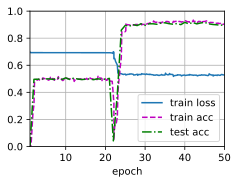

In [ ]:
batch_size = 2048
data_dir = d2l.download_extract('ctr')
train_data = d2l.CTRDataset(os.path.join(data_dir, 'train.csv'))
test_data = d2l.CTRDataset(os.path.join(data_dir, 'test.csv'),
                           feat_mapper=train_data.feat_mapper,
                           defaults=train_data.defaults)
field_dims = train_data.field_dims
train_iter = gluon.data.DataLoader(
    train_data, shuffle=True, last_batch='rollover', batch_size=batch_size,
    num_workers=d2l.get_dataloader_workers())
test_iter = gluon.data.DataLoader(
    test_data, shuffle=False, last_batch='rollover', batch_size=batch_size,
    num_workers=d2l.get_dataloader_workers())
devices = d2l.try_all_gpus()
net = DeepFM(field_dims, num_factors=10, mlp_dims=[256, 128, 64, 32])
net.initialize(init.Xavier(), ctx=devices)
lr, num_epochs, optimizer = 0.01, 50, 'adam'
trainer = gluon.Trainer(net.collect_params(), optimizer,
                        {'learning_rate': lr})
loss = gluon.loss.SigmoidBinaryCrossEntropyLoss()
d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs, devices)

### Deep Factorization Machine using `ctr`

Before managing the dependencies in the previous section we had plans to use the following implementation but we had no success. The code is still here in case you want to somehow make it runnable.

https://github.com/rixwew/pytorch-fm/blob/master/examples/main.py

! pip install 

! pip install xlearn

init dataset 

https://www.analyticsvidhya.com/blog/2018/01/factorization-machines/



#### Import

In [ ]:
import pandas as pd
import torch
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from deepctr_torch.inputs import SparseFeat, DenseFeat, get_feature_names
from deepctr_torch.models import *

#### data

In [ ]:
data = gf.drop('click_timestamp', axis=1)
data['Sale'] = data['Sale'].astype(int)
data = data.rename(columns={"Sale": "label"})


In [ ]:
# dense_features = ['I' + str(i) for i in range(1, n_numeric_columns)]
# sparse_features = ['C' + str(i) for i in range(1, n_non_numeric_columns)]

dense_features = data.select_dtypes('number').columns
sparse_features = data.select_dtypes('object').columns
data[sparse_features] = data[sparse_features].fillna('-1', )
data[dense_features] = data[dense_features].fillna(0, )

target = ['label']

In [ ]:
data

#### Simple preprocessing
Usually there are two simple way to encode the sparse categorical feature for embedding

* Label Encoding: map the features to integer value from 0 ~ len(#unique) - 1

* Hash Encoding: 【Currently not supported】.

#### Label Encoding for sparse features

In [ ]:
for feat in sparse_features:
    lbe = LabelEncoder()
    data[feat] = lbe.fit_transform(data[feat])

#### simple Transformation for dense features
for dense numerical features,they are usually discretized to buckets,here we use normalization.

In [ ]:
mms = MinMaxScaler(feature_range=(0,1))
data[dense_features] = mms.fit_transform(data[dense_features])

#### Generate feature columns

For sparse features, we transform them into dense vectors by embedding techniques. For dense numerical features, we concatenate them to the input tensors of fully connected layer.


In [ ]:
#count unique features for each sparse field,and record dense feature field name
fixlen_feature_columns = [SparseFeat(feat, data[feat].nunique())
                              for feat in sparse_features] + [DenseFeat(feat, 1, )
                                                              for feat in dense_features]

dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

feature_names = get_feature_names(
    linear_feature_columns + dnn_feature_columns)

#### generate input data for model

In [ ]:
# data['Sale'] = data['Sale'].astype(int)

train, test = train_test_split(data, test_size=0.2)
# feature_names.remove('Sale')

train_model_input = {name: train[name] for name in feature_names}
test_model_input = {name: test[name] for name in feature_names}


# y = data['Sale'].to_numpy()
# X = data.drop(columns=['Sale']).to_numpy()
# from sklearn.model_selection import train_test_split 
# x_train, x_temp, y_train, y_temp = train_test_split(
#     X, y, test_size=0.3, random_state=43, shuffle=True)
# x_val, x_test, y_val, y_test = train_test_split(
#     x_temp, y_temp, test_size=0.33333, random_state=43, shuffle=True)

# print('shape x_train:', x_train.shape)
# print('shape x_val:', x_val.shape)
# print('shape x_test:', x_test.shape)
# print()

# print('shape y_train:', y_train.shape)
# print('shape y_val:', y_val.shape)
# print('shape y_test:', y_test.shape)

#### Define Model,train,predict and evaluate

In [ ]:
model.fit?

In [ ]:
device = 'cpu'
use_cuda = True
if use_cuda and torch.cuda.is_available():
    print('cuda ready...')
    device = 'cuda:0'

model = DeepFM(linear_feature_columns=linear_feature_columns, dnn_feature_columns=dnn_feature_columns,
                task='binary',
                l2_reg_embedding=1e-5, device=device)

model.compile("adagrad", "binary_crossentropy",
              metrics=["binary_crossentropy", "auc"], )
model.fit(train_model_input,train[target].values,
          batch_size=32,epochs=10,
          verbose=2,validation_split=0.0)

pred_ans = model.predict(test_model_input, 256)
print("")
print("test LogLoss", round(log_loss(test[target].values, pred_ans), 4))
print("test AUC", round(roc_auc_score(test[target].values, pred_ans), 4))

In [ ]:
labels

In [ ]:
model

### DeepWide 
The deep wide model is somehow simillar to the DeepFM as it learns the features both deep and shallow. 

The DeepWide model proved to work better than the DeepFM and can be chosen as the final model. We think that has something to do with the way they do feature engineering: Maybe the features do not have such mathematical relation with each other that the Factorization machine is trying to model, hence DeepWide outperforms it.

In developement of this section [this article](https://towardsdatascience.com/pytorch-widedeep-deep-learning-for-tabular-data-9cd1c48eb40d) was quite helpful.


In [ ]:
# ! pip install pytorch-widedeep


In [ ]:
from pytorch_widedeep import Trainer
from pytorch_widedeep.preprocessing import WidePreprocessor, TabPreprocessor
from pytorch_widedeep.models import Wide, TabMlp, WideDeep
from pytorch_widedeep.metrics import Accuracy

In [ ]:
# Download cleaned data
! gdown --id 1UZD4m0fDj9LAgAPX6mrN4fYonAkUYdq1
import pandas as  pd
data = pd.read_csv('filled_dataset.csv')
data = data.drop(data.columns[[0, 1]], axis=1)  # df.columns is zero-based pd.Index
data

Downloading...
From: https://drive.google.com/uc?id=1UZD4m0fDj9LAgAPX6mrN4fYonAkUYdq1
To: /content/filled_dataset.csv
100% 24.7M/24.7M [00:00<00:00, 244MB/s]


,Sale,nb_clicks_1week,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_country,product_id,product_title,partner_id,user_id,click_timestamp_secs
0,0.0,326.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,B51388CE4A9AA3CFD86DEBBB434BAE11,A5D15FC386510762EC0DDFF54ABE6F94,41417B1A2B2BCD8B234EC61B886FADCF,635623BABBB7DA2E072D8C339F606E15,80DF9DD23FCDB4F869BD699276D0A677,E4E565E79CE9F35744B7C43DDFB8B07C,064556360E05D2015C183D7D9F808884,220747D7CBBCDDB0A25FEA3F5C1FE25F,57A1D462A03BD076E029CF9310C11FC5,A51EB5C7DE0D3518D31D6ABA910FFD83,41417B1A2B2BCD8B234EC61B886FADCF 68291C52DA667...,A9D8254930B7A1D7265C595AE6120C90,117AC647F9AD7BB3E0F7ED0BA947F528,1.596526e+09
1,0.0,35.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,54FA113F9CC4F3EE0F30C54EC968113F,A5D15FC386510762EC0DDFF54ABE6F94,8D4EE2AF8207DD97BE20AD96F014AD95,033E492229C2222EFAA16EE8A6462D8B,D28A87BAAF0922BEB3E8099E6E262237,AA4B14C4176A235370FAF604A5FEA467,067525A83E1875CB1828F4F9ADC752F6,DC3F316AA514CDA1C7E9F84552EFAC4F,2AC62132FBCFA093B9426894A4BC6278,48246AF5280D2B2BD91718A6796140C1,4F1F93F65CDC91886883DBB25E60563E 2FC81788CFD2B...,9D8E4D89210B822B2060852D2DD143FE,D80BA17E82A24C570EE33F9983D30D33,1.596536e+09
2,1.0,0.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,753CF7753EC7A396179ED3594653CC13,A5D15FC386510762EC0DDFF54ABE6F94,5740DF2012C7D506A0798A3ABB21550F,B4B45C6CE5FC4DE45AB02974D8849DBD,A78952B21B4165ADA2189AE66887E2F1,30131E72F860C21850E0F2BB16B862DF,C9AD8B2AEB38F319F959CBAC5B8B5DCB,D220ED97B07AF0D12C1D8AEBDAFB8E2A,57A1D462A03BD076E029CF9310C11FC5,5C70BCFD2C4D7FE89950A50471ED454C,D9D8B26F34985A255BF8E50049004D19 C7F1AB27EE3B4...,E3DDEB04F8AFF944B11943BB57D2F620,27B67F58E056750BF16600D06BEFB857,1.596478e+09
3,0.0,2.0,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,BF676ED2A1DE4CB09D9ED1E179A8400D,1B491180398E2F0390E6A588B3BCE291,D544DD4C9E7F122F9299A06DCC827F2B,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,555EE90CF6686FFF818AC7065AAB2773,067525A83E1875CB1828F4F9ADC752F6,352F46BE455C3856029AB197A4361404,2AC62132FBCFA093B9426894A4BC6278,D516F9BA8A899DD973F44572EDF3437C,D544DD4C9E7F122F9299A06DCC827F2B DF7E405D9A797...,95F6B7BA0BA90E5D5DF1CC063390BA51,4FDECC35CE92218F9D05BE3FA441DED3,1.596518e+09
4,0.0,75.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,54FA113F9CC4F3EE0F30C54EC968113F,C45A9AC6D102ACAEEDF0D6F78636D84A,E96F5BEE9F0B4E2B7091F58CFE499E60,88CED8BA3AA711A20ACF8B1FC574F218,B0D05C25C172D0737F04EF0AF0663D28,1C505D56EC31D1FEA4742CBF7F9A2049,1A5073D2C32534FD3D52491F8E7C8DF2,51EBAAC05E372CBCDF0F207517A225AB,2AC62132FBCFA093B9426894A4BC6278,A7B02E64AF05D0401A5440B96570ADE6,DD58DEB3EFE5013E0E55CE709E40CB85 5ADFA094AAE72...,88260BA531D42D8FFD07321127341979,EB89B89A23C5E27622860EFB13D37D91,1.596553e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38833,0.0,77.0,921B36149E5B081FD24450BFE2CE4430,7E56C27BFF0305E788DA55A029EC4988,8500AD0D4542BD1EB7ABDF37F09056F8,A5D15FC386510762EC0DDFF54ABE6F94,AA06156549438A4EA05C3693E6E9A600,E02400CDAD96905D88E932FE9B7D3552,4295BE0EC68D12EDB7D771310069C493,F65E84139E30EFFADA597CCFC9D654BA,3C9B308AE9AF9C12719BBB17835EEFEA,DC3F316AA514CDA1C7E9F84552EFAC4F,D963E3BCE149E71F5D5E3000DCF68A9F,3EDF8E070393CCAFDA41A8DDBD6CD3FA,8B698195738EFBA10DB86CEC7642E72B B486779308D36...,F122B91F6D102E4630817566839A4F1F,58222C7FFE54BD49071FDD1A2D7A372F,1.596557e+09
38834,0.0,2.0,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,BEB1D7D640D653054BB0B319F519BD9C,1B491180398E2F0390E6A588B3BCE291,5AF76278CF13478663F2F952871C86DD,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,0DB5A628B00C214EF305047A4CB34F76,724EEDA950B27E8C85D77149D0B74B58,989EEF92F2A525DD896557425EA7C4C7,8A103927BEF11D8BB62C1A936ECBFC46,5AF76278CF13478663F2F

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size=0.2, stratify=data.Sale)

In [ ]:
# data = df.copy()

#### Prepare the wide and deep columns

https://pytorch-widedeep.readthedocs.io/en/latest/preprocessing.html

In [ ]:
# prepare wide, crossed, embedding and continuous columns
wide_cols = data.select_dtypes('object').columns

embed_cols = data.select_dtypes('object').columns

cont_cols = data.select_dtypes('number').columns

target_col = "Sale"

# target
target = df_train[target_col].values

#### Preprocessing and model components definition

In [ ]:
import numpy as np
# wide
wide_preprocessor = WidePreprocessor(wide_cols=wide_cols)
X_wide = wide_preprocessor.fit_transform(df_train)
wide = Wide(wide_dim=np.unique(X_wide).shape[0], pred_dim=1)

# deeptabular
tab_preprocessor = TabPreprocessor(embed_cols=embed_cols,
                                   continuous_cols=cont_cols,
                                   scale=True, auto_embed_dim=True)
X_tab = tab_preprocessor.fit_transform(df_train)

deeptabular = TabMlp(
    mlp_hidden_dims=[64, 32],
    column_idx=tab_preprocessor.column_idx,
    embed_input=tab_preprocessor.embeddings_input,
    continuous_cols=cont_cols,
)

# wide and deep
model = WideDeep(wide=wide, deeptabular=deeptabular)

#### Fit and predict

In [ ]:
# train the model
trainer = Trainer(model, objective="binary", metrics=[Accuracy])
trainer.fit(
    X_wide=X_wide,
    X_tab=X_tab,
    target=target,
    n_epochs=10,
    batch_size=256,
    val_split=0.1,
)

# predict
X_wide_te = wide_preprocessor.transform(df_test)
X_tab_te = tab_preprocessor.transform(df_test)
preds = trainer.predict(X_wide=X_wide_te, X_tab=X_tab_te)

predict: 100%|██████████| 31/31 [00:00<00:00, 47.83it/s]


In [ ]:
from sklearn.metrics import accuracy_score

# make predictions for test data
y_pred = preds
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(df_test.Sale, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 99.55%


In [ ]:
#report result precision, recall, f1-score on test data
from sklearn.metrics import classification_report
# y_pred = model.predict(X)
r = classification_report(df_test.Sale, predictions)
print(r)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6685
         1.0       0.97      1.00      0.98      1083

    accuracy                           1.00      7768
   macro avg       0.99      1.00      0.99      7768
weighted avg       1.00      1.00      1.00      7768

